## Import Data

In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

DIR = os.getcwd()
print(DIR)



df = pd.read_csv(DIR + "/2019to2020contributions.csv",
                    parse_dates = ["contribution_receipt_date"]) 

df.columns

/Users/lukedobrovic/Data/CampaignContributions


/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3062: DtypeWarning: Columns (12,18,20,32,50,51,53,54,57,59) have mixed types. Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


Index(['committee_id', 'committee_name', 'report_year', 'report_type',
       'image_number', 'line_number', 'transaction_id', 'file_number',
       'committee_name.1', 'entity_type', 'entity_type_desc',
       'unused_contbr_id', 'contributor_prefix', 'contributor_name',
       'recipient_committee_type', 'recipient_committee_org_type',
       'recipient_committee_designation', 'contributor_first_name',
       'contributor_middle_name', 'contributor_last_name',
       'contributor_suffix', 'contributor_street_1', 'contributor_street_2',
       'contributor_city', 'contributor_state', 'contributor_zip',
       'contributor_employer', 'contributor_occupation', 'contributor_id',
       'receipt_type', 'receipt_type_desc', 'receipt_type_full', 'memo_code',
       'memo_code_full', 'contribution_receipt_date',
       'contribution_receipt_amount', 'contributor_aggregate_ytd',
       'candidate_id', 'candidate_name', 'candidate_first_name',
       'candidate_last_name', 'candidate_middle_na

## Data Cleaning: Select desired columns, remove other "Columbia" institutions and remove negative values under contributions

In [2]:
# df.columns
df_selections = df[[ "committee_name", "contribution_receipt_date",
                    "contribution_receipt_amount", "contributor_employer", 
                   "contributor_occupation", "contributor_first_name", 
                   "contributor_middle_name", "contributor_last_name"]]

In [3]:
faux = ["MISSOURI", "BRITISH", "DISTRICT", "CHICAGO", "INTERNATIONAL", "MO", "UNIVERSITY HOSPITAL", "FLORIDA",
       "CAROLINA"]

df_selections = df_selections[~df_selections.contributor_employer.str.contains('|'.join(faux))]

df_selections = df_selections[df_selections["contribution_receipt_amount"] >= 0]  

## Create dataframes with contributions to each campaign

In [19]:
df_biden = df_selections[df_selections["committee_name"].str.contains("BIDEN FOR PRESIDENT")]

df_biden.reset_index()

df_trump = df_selections[df_selections["committee_name"].str.contains("DONALD J. TRUMP FOR PRESIDENT, INC.")]

df_trump.reset_index()

index                       committee_name contribution_receipt_date  \
0       89  DONALD J. TRUMP FOR PRESIDENT, INC.                2019-03-05   
1       90  DONALD J. TRUMP FOR PRESIDENT, INC.                2019-01-10   
2       91  DONALD J. TRUMP FOR PRESIDENT, INC.                2019-01-20   
3       92  DONALD J. TRUMP FOR PRESIDENT, INC.                2019-02-20   
4       93  DONALD J. TRUMP FOR PRESIDENT, INC.                2019-03-20   
..     ...                                  ...                       ...   
103  46799  DONALD J. TRUMP FOR PRESIDENT, INC.                2020-08-07   
104  46801  DONALD J. TRUMP FOR PRESIDENT, INC.                2020-08-09   
105  47065  DONALD J. TRUMP FOR PRESIDENT, INC.                2020-09-07   
106  47066  DONALD J. TRUMP FOR PRESIDENT, INC.                2020-08-30   
107  47067  DONALD J. TRUMP FOR PRESIDENT, INC.                2020-09-09   

     contribution_receipt_amount                  contributor_employer  \
0                        2800.00                   COLUMBIA UNIVERSITY   
1                          25.00              NYPH/COLUMBIA UNIVERSITY   
2                          35.00              NYPH/COLUMBIA UNIVERSITY   
3                          35.00              NYPH/COLUMBIA UNIVERSITY   
4                          35.00              NYPH/COLUMBIA UNIVERSITY   
..                           ...                                   ...   
103                         0.37    COLUMBIA UNIVERSITY MEDICAL CENTER   
104                        26.25                   COLUMBIA UNIVERSITY   
105                        23.75  TEACHERS COLLEGE COLUMBIA UNIVERSITY   
106                       118.75          COLUMBIA SOUTHERN UNIVERSITY   
107                        95.00                   COLUMBIA UNIVERSITY   

    contributor_occupation contributor_first_name contributor_middle_name  \
0     PSYCHOLOGY PROFESSOR                 ROBERT                     NaN   
1                       RN                 GISELA                     NaN   
2                       RN                 GISELA                     NaN   
3                       RN                 GISELA                     NaN   
4                       RN                 GISELA                     NaN   
..                     ...                    ...                     ...   
103          LAB SCIENTIST                 RAFAEL                     NaN   
104           TECHNOLOGIST                 ANDREW                     NaN   
105             ACCOUNTANT                    KIM                       M   
106              PROFESSOR                  CHRIS                     NaN   
107              PROFESSOR                 JOSEPH                       D   

    contributor_last_name  
0                 SIEGLER  
1                  MINIER  
2                  MINIER  
3                  MINIER  
4                  MINIER  
..                    ...  
103                FERRER  
104             MADEJCZYK  
105               SANTORO  
106                  WIKE  
107           TERWILLIGER  

[108 rows x 9 columns]

# Plots for donations per campaign and total donation $

In [28]:
print(df_trump.shape)
print(df_biden.shape)

(108, 8)
(1177, 8)


In [70]:
import pandas as pd 
import matplotlib.pyplot as plt 
from pywaffle import Waffle 

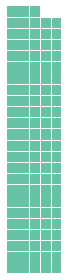

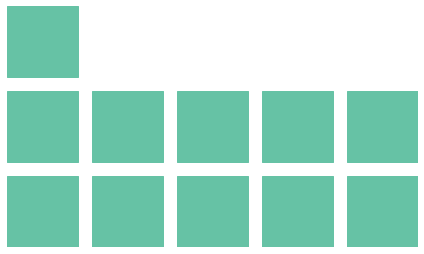

In [89]:
data2 = {'campaign': ['Biden', 'Trump'],
        'donations': [1177, 108]}

df3 = pd.DataFrame(data)

fig = plt.figure(FigureClass=Waffle,
                 columns=5,
                values=[117.7],
#                 figsize=(20,6),
                vertical=True,
                rounding_rule='floor')
fig.savefig("biden_donations.svg")
fig2 = plt.figure(FigureClass=Waffle, 
                 columns=5,
                 values=[10.8],
#                  figsize=(10,6),
                 vertical=True,
                 rounding_rule='floor')
fig2.savefig("trump_donations.svg")

# Group contributions by receipt date for each campaign and visualize!

In [5]:
df_dummy = df_selections.sort_values(by="contribution_receipt_date", ascending=False)
df_dummy.head()

committee_name  \
47069  KENTUCKY STATE DEMOCRATIC CENTRAL EXECUTIVE CO...   
47070  KENTUCKY STATE DEMOCRATIC CENTRAL EXECUTIVE CO...   
47647                                 MOVEMENT VOTER PAC   
8018                                  THE MAJORITY RULES   
49578                               LET AMERICA VOTE PAC   

      contribution_receipt_date  contribution_receipt_amount  \
47069                2020-10-12                       1000.0   
47070                2020-10-06                         25.0   
47647                2020-09-30                        500.0   
8018                 2020-09-30                         50.0   
49578                2020-09-30                         50.0   

      contributor_employer contributor_occupation contributor_first_name  \
47069  COLUMBIA UNIVERSITY              PROFESSOR             EVANGELINE   
47070  COLUMBIA UNIVERSITY              PROFESSOR                MICHAEL   
47647  COLUMBIA UNIVERSITY                TEACHER                JANLORI   
8018   COLUMBIA UNIVERSITY      TEACHER - RETIRED                  GRACE   
49578  COLUMBIA UNIVERSITY              PHYSICIAN                  HENRY   

      contributor_middle_name contributor_last_name  
47069                     NaN               MORPHOS  
47070                     NaN              GOLDBERG  
47647                     NaN               GOLDMAN  
8018                      NaN                CHRIST  
49578                     NaN              GINSBERG

In [6]:
df_biden = df_biden.groupby(["contribution_receipt_date"], as_index=False).sum()

df_trump = df_trump.groupby(["contribution_receipt_date"], as_index=False).sum()

In [7]:
df_max = df_trump.sort_values(by="contribution_receipt_date", ascending=False)

df_max

contribution_receipt_date  contribution_receipt_amount
77                2020-09-29                        120.0
76                2020-09-28                        250.0
75                2020-09-25                          1.0
74                2020-09-21                        500.0
73                2020-09-15                         25.0
..                       ...                          ...
4                 2019-03-20                         35.0
3                 2019-03-05                       5600.0
2                 2019-02-20                         35.0
1                 2019-01-20                         35.0
0                 2019-01-10                         25.0

[78 rows x 2 columns]

In [8]:
df_max = df_trump.sort_values(by="contribution_receipt_amount", ascending=False)

df_max

contribution_receipt_date  contribution_receipt_amount
3                 2019-03-05                      5600.00
74                2020-09-21                       500.00
67                2020-09-06                       295.43
76                2020-09-28                       250.00
72                2020-09-14                       250.00
..                       ...                          ...
49                2020-06-25                         1.00
62                2020-08-10                         1.00
75                2020-09-25                         1.00
57                2020-07-31                         1.00
66                2020-09-05                         0.93

[78 rows x 2 columns]

In [9]:
df_trump["contribution_receipt_amount"].sum()

10900.09

In [10]:
df_RNC = df_pataki = df_selections[df_selections["committee_name"].str.contains("REPUBLICAN NATIONAL COMMITTEE")]
print("RNC: ", df_RNC["contribution_receipt_amount"].sum())

RNC:  1810.2


Text(0.5, 1.0, 'Contributions to Trump Campaign since 1/1/2019')

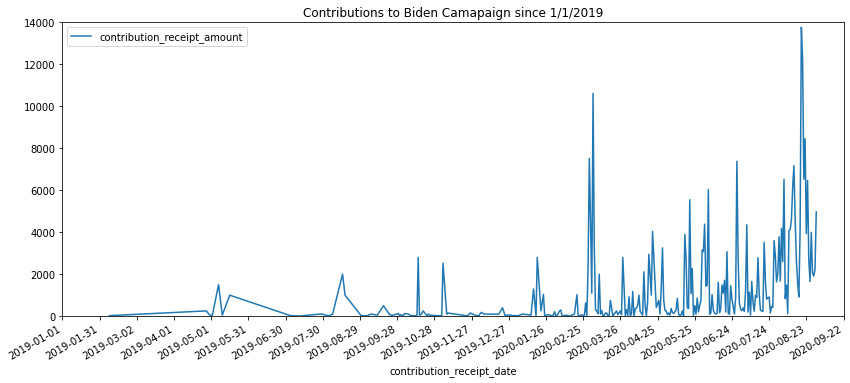

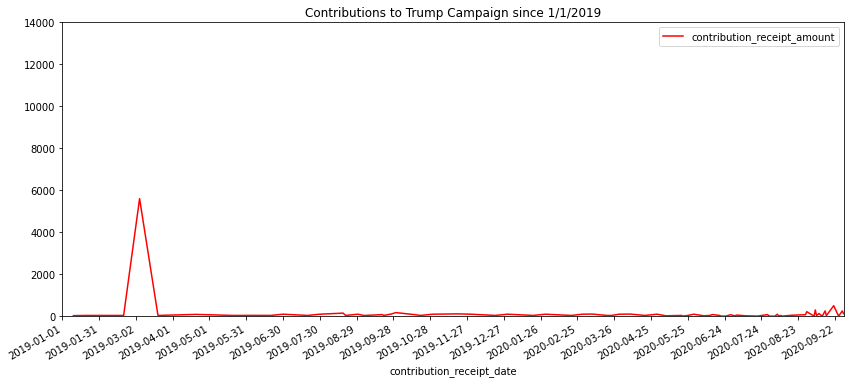

In [11]:
from datetime import datetime, timedelta
t = np.arange(datetime(2019,1,1), datetime(2020,10,1), timedelta(days=30)).astype(datetime)
# y = [0, 2000, 4000, 6000, 8000, 10000, 12000, 14000]

ax1 = df_biden.plot(x="contribution_receipt_date", y="contribution_receipt_amount",
             figsize=(14, 6))
ax1.set_xticks(t)
ax1.set_ylim([0, 14000])
ax1.set_title("Contributions to Biden Camapaign since 1/1/2019")


ax2 = df_trump.plot(x="contribution_receipt_date", y="contribution_receipt_amount",
                   figsize=(14,6),
                   color="red")
ax2.set_xticks(t)
ax2.set_ylim([0, 14000])
ax2.set_title("Contributions to Trump Campaign since 1/1/2019")

## Collect and visualize top committes by funds raised over 2019-2020

In [12]:
df_committees = df_selections.groupby(["committee_name"], as_index=False).sum()
df_committees.sort_values(by="contribution_receipt_amount", ascending=False, inplace=True)
df_committees.reset_index(inplace=True)

df_committees.head()

index                                     committee_name  \
0      4                                            ACTBLUE   
1     31                                BIDEN FOR PRESIDENT   
2     34                                 BLUE TIDE NY-1 LLC   
3     28                                        BERNIE 2020   
4     86  DNC SERVICES CORP / DEMOCRATIC NATIONAL COMMITTEE   

   contribution_receipt_amount  
0                    744165.71  
1                    321338.12  
2                    172000.00  
3                     70965.79  
4                     67177.50

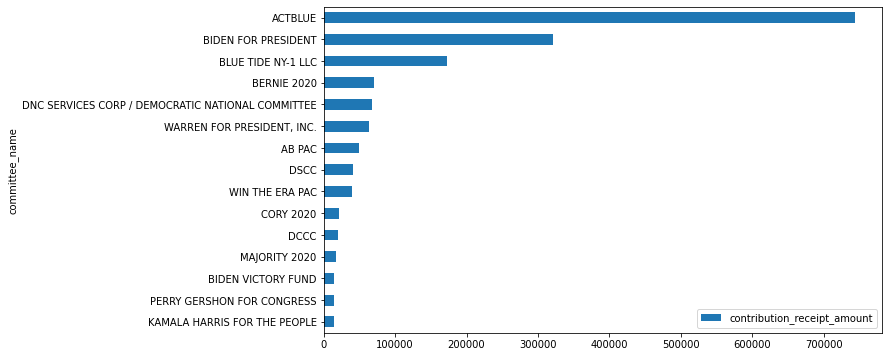

In [13]:
ax3 = df_committees.head(15).plot(kind="barh",
                        x = "committee_name",
                        y = "contribution_receipt_amount",
                                 figsize=(10,6))
ax3.invert_yaxis()

In [14]:
df_bernie = df_selections[df_selections["committee_name"].str.contains("BERNIE 2020")]
print("Bernie: ", df_bernie["contribution_receipt_amount"].sum())

Bernie:  70965.79000000001


## Collect and visualize occupation of individual Columbia donors 

In [16]:
df_occ = df_selections.drop_duplicates(subset=["contributor_last_name", "contributor_middle_name",
                                              "contributor_middle_name"])

occupations = df_occ["contributor_occupation"].value_counts()

occupations.head(15)

PROFESSOR             527
PHYSICIAN             229
STUDENT               199
GRADUATE STUDENT      134
RESEARCHER            100
SCIENTIST              92
RESEARCH ASSISTANT     83
TEACHER                67
ADMINISTRATOR          62
PHD STUDENT            53
TEACHING ASSISTANT     44
LECTURER               39
EDUCATOR               33
LIBRARIAN              32
RESEARCH SCIENTIST     29
Name: contributor_occupation, dtype: int64

In [13]:
len(occupations)

971

In [26]:
others = 0
for x in range(15, 972, 1):
    others += occupations[x]
    
others

IndexError: index out of bounds

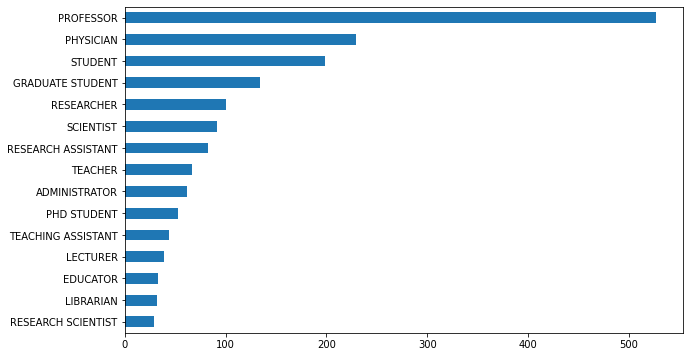

In [15]:
ax4 = occupations.head(15).plot(kind="barh",
                               figsize=(10,6))
ax4.invert_yaxis()

## Bubble plot for individual Columbia donors

In [23]:
from pprint import pprint as pp
import circlify as circ

[Circle(x=-0.8246740102706162, y=-0.3603824506074648, r=0.10002070361498756, level=1, ex={'datum': 29}),
 Circle(x=-0.41752045684636646, y=-0.48627855559102334, r=0.1050668944304286, level=1, ex={'datum': 32}),
 Circle(x=-0.7940444584156029, y=-0.15594762110682883, r=0.10669593567607924, level=1, ex={'datum': 33}),
 Circle(x=-0.8289495457878102, y=0.15095752353235095, r=0.11599071082215731, level=1, ex={'datum': 39}),
 Circle(x=-0.19548416811349262, y=-0.4333020686958607, r=0.12320185436804669, level=1, ex={'datum': 44}),
 Circle(x=-0.5859786225784833, y=-0.2997832914228307, r=0.1462469276307411, level=1, ex={'datum': 62}),
 Circle(x=-0.3112579679913343, y=-0.1836046306135065, r=0.15202965422616502, level=1, ex={'datum': 67}),
 Circle(x=-0.5779292259008157, y=0.015572453353131276, r=0.16921153009400602, level=1, ex={'datum': 83}),
 Circle(x=-0.6221311068572004, y=0.3601097364531111, r=0.17814958708233825, level=1, ex={'datum': 92}),
 Circle(x=-0.3954380183130944, y=0.6447522336828151, 

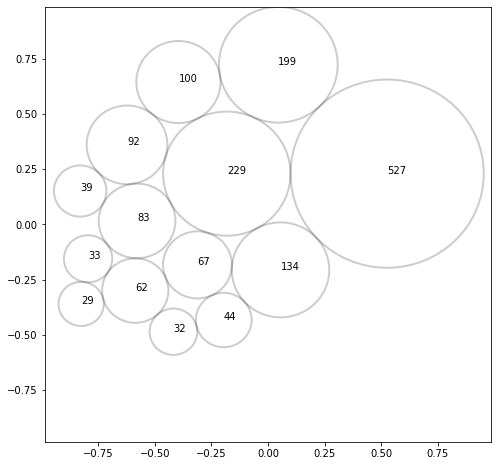

In [25]:
circles2 = circ.circlify([occupations[0], 
                          occupations[1], 
                          occupations[2],
                          occupations[3],
                          occupations[4],
                          occupations[5],
                          occupations[6],
                          occupations[7],
                          occupations[8],
                          occupations[10],
                          occupations[11],
                         occupations[12],
                         occupations[13],
                         occupations[14]],
                         show_enclosure=False)
pp(circles2)
circ.bubbles(circles2)